Previous code to compute concentrations: PS_calculate_conc.

Read in concentrations in units of micrograms sugar/mL buffer.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

# Read in data from Excel
#df = pd.read_excel('PS_output_022125.xlsx')
df = pd.read_excel('PS_output.xlsx')

# Show the first few rows of the data
print(df.head())

# loosely-bound (lb) and tightly-bound (tb) data
C_lb_tmp  = df.iloc[1:4, 1:].values  # indexing excludes the last index
C_tb_tmp  = df.iloc[6:9, 1:].values  
## convert to numeric
C_lb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(C_lb_tmp)  # 2D array
C_tb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(C_tb_tmp) 

# size_name = ['40', '20', '14', '10', '7', '5']
size_name = ['0 - 0.85', '0.85 - 1.4', '1.4 - 2', '2 - 2.8', '2.8 - 4', '>4']

  Units: ug sugar/mL buffer  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                        LB   40.000000   20.000000   14.000000   10.000000   
1                         A   12.182325    9.310070    5.298816    5.893076   
2                         B    7.081595    6.388292    4.902643    3.912210   
3                         C   11.216469    7.184743    6.512789    5.995901   
4                       NaN         NaN         NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  
0    7.000000    5.000000  
1    7.477769    4.060775  
2    4.110297    3.466515  
3    6.874610    2.532751  
4         NaN         NaN  


In [3]:
# verify data contents
print(C_lb0)
print(C_tb0)
#print(size_name)

[[12.1823251   9.31006959  5.2988162   5.89307596  7.47776866  4.06077503]
 [ 7.08159549  6.38829243  4.90264303  3.91221009  4.11029668  3.46651527]
 [11.21646947  7.18474311  6.51278872  5.99590073  6.87461032  2.53275117]]
[[53.87955166 43.48000585 45.85704489 51.50251262 61.0106688  42.48957291]
 [45.33107706 34.26967399 31.53016762 31.27172363 35.30344998 28.84235006]
 [43.93547947 33.6494084  25.2758229  10.28607108 26.92986448 27.49844127]]


Read in VSS data

In [5]:
# Read in VSS (mg VSS to 25 mg TSS)
VSS_tmp = df.iloc[10, 1:].values   
VSS_0  = pd.to_numeric(VSS_tmp, errors='coerce')
print(VSS_0)

[22.36842105 22.19827586 22.51712329 21.54150198 20.46460177 20.9375    ]


Convert the data from micrograms protein/mL buffer to mg protein/gVSS

In [6]:
# define VSS factor: 10 mL buffer / mg VSS in sample
VSS_factor = np.round(10 / VSS_0, 3)  
print(VSS_factor)

# determine concentration of unknown samples [ug protein/mg VSS] simplifies to [mg protein/gVSS]
C_lb = VSS_factor * C_lb0  # [mg/g VSS] 
C_tb = VSS_factor * C_tb0  # [mg/g VSS]
print('concentration[ug/mL]: ', C_lb)

[0.447 0.45  0.444 0.464 0.489 0.478]
concentration[ug/mL]:  [[5.44549932 4.18953131 2.35267439 2.73438725 3.65662887 1.94105047]
 [3.16547318 2.87473159 2.1767735  1.81526548 2.00993508 1.6569943 ]
 [5.01376185 3.2331344  2.89167819 2.78209794 3.36168445 1.21065506]]


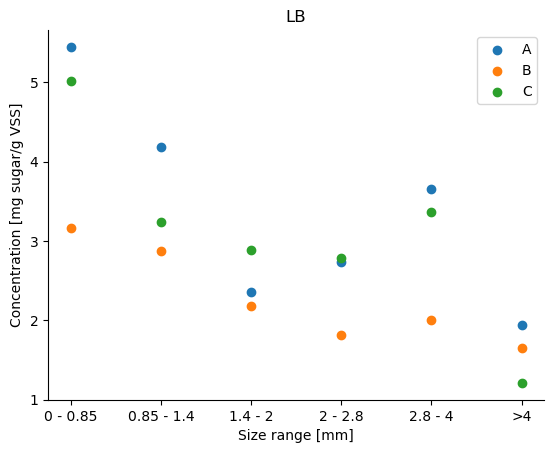

In [7]:
plt.scatter(size_name, C_lb[0,:], label = 'A')
plt.scatter(size_name, C_lb[1,:], label = 'B')
plt.scatter(size_name, C_lb[2,:], label = 'C')

# axes labels
plt.title("LB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [mg sugar/g VSS]")
plt.legend() 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('PS_LB_VSS.png')

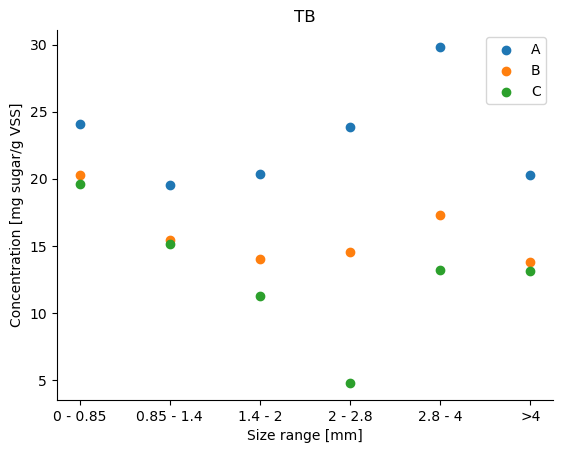

In [8]:
plt.scatter(size_name, C_tb[0,:], label = 'A')
plt.scatter(size_name, C_tb[1,:], label = 'B')
plt.scatter(size_name, C_tb[2,:], label = 'C')

# axes labels
plt.title("TB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [mg sugar/g VSS]")
plt.legend() 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('PS_TB_VSS.png')